### Classification project for logistic regression:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle

In [2]:
with open("x_liv.pkl", 'rb') as picklefile: 
    x_liv = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    y_liv = pickle.load(picklefile)

In [3]:
with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train_liv = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test_liv = pickle.load(picklefile)

with open("x_train_liv.pkl", 'rb') as picklefile: 
    x_train_liv = pickle.load(picklefile)

with open("x_test_liv.pkl", 'rb') as picklefile: 
    x_test_liv = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train_scaled_liv = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test_scaled_liv = pickle.load(picklefile)
    
with open("x_scaled_liv.pkl", 'rb') as picklefile: 
    x_scaled_liv = pickle.load(picklefile)

with open("patientdataICD9_liv.pkl", 'rb') as picklefile: 
    patientdataICD9_liv = pickle.load(picklefile)

In [4]:
# using the scaled x-train and x-test because it's Logistic
x_train = x_train_scaled_liv
y_train = y_train_liv
x_test = x_test_scaled_liv
y_test = y_test_liv
x = x_scaled_liv
y = y_liv

In [5]:
y = y.str.replace('>30','NO')
y_test = y_test.str.replace('>30','NO')
y_train = y_train.str.replace('>30','NO')

#### Logistic regression with test/train split (25% for test):

In [7]:
# this is being pulled in from pickle

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [29]:
lrmodel = linear_model.LogisticRegression(class_weight="balanced")
lrmodel.fit(x_train,y_train)
#lrmodel.score(x_test,y_test)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [30]:
# This code achieves the same thing as lrmodel.score(x_test,y_test)

# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.670
             precision    recall  f1-score   support

        <30       0.19      0.57      0.28      2839
         NO       0.93      0.68      0.79     22190

avg / total       0.84      0.67      0.73     25029



#### Logistic regression with cross-validation:

In [31]:
# 10-fold cross-validation with logistic regression
# stratifying the Kfold splits is default in CV
# returning the average score
print(cross_val_score(lrmodel, x, y, cv=10, scoring='accuracy').mean())

0.6647017964057517


In [32]:
y_test.unique()

array(['NO', '<30'], dtype=object)

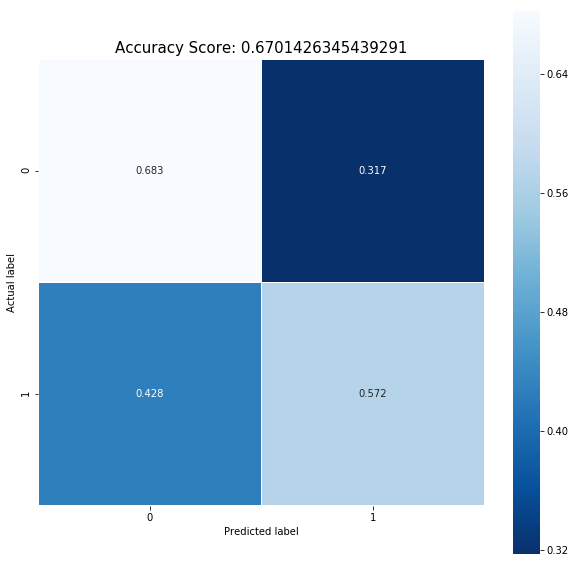

In [33]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=list(y_test.unique()))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [34]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[0.68273997, 0.31726003],
       [0.42831983, 0.57168017]])

In [35]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.670
             precision    recall  f1-score   support

        <30       0.19      0.57      0.28      2839
         NO       0.93      0.68      0.79     22190

avg / total       0.84      0.67      0.73     25029



In [36]:
lrmodel.coef_.shape

(1, 266)

#### Get the coefficients:

In [37]:
coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [38]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [39]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Coefficients,Feature,abs_val_coef
101,1.957845,medical_specialty[T.Gynecology],1.957845
48,1.630531,discharge_disposition_id[T.Hospice / home],1.630531
31,1.491997,admission_type_id[T.Trauma Center],1.491997
125,1.459379,medical_specialty[T.Pediatrics-Endocrinology],1.459379
197,1.410071,"diag_3[T.Complications Of Pregnancy, Childbirt...",1.410071
226,1.402369,nateglinide[T.Up],1.402369
178,1.396141,"diag_2[T.Complications Of Pregnancy, Childbirt...",1.396141
47,1.285121,discharge_disposition_id[T.Discharged/transfer...,1.285121
46,1.253131,discharge_disposition_id[T.Discharged/transfer...,1.253131
118,1.249518,medical_specialty[T.Otolaryngology],1.249518


#### Grid search Logistic Regression:

In [40]:
# list(np.arange(0.0, 10.0, 0.1))

In [41]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=10, scoring='accuracy')

In [42]:
# fit the grid with data 
grid.fit(x, y);

In [43]:
# view the complete results (list of named tuples)
grid.grid_scores_

/Users/etheredgej/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.66548, std: 0.03442, params: {'C': 0.1},
 mean: 0.66508, std: 0.03491, params: {'C': 0.2},
 mean: 0.66511, std: 0.03507, params: {'C': 0.30000000000000004},
 mean: 0.66497, std: 0.03516, params: {'C': 0.4},
 mean: 0.66486, std: 0.03517, params: {'C': 0.5},
 mean: 0.66475, std: 0.03513, params: {'C': 0.6},
 mean: 0.66473, std: 0.03512, params: {'C': 0.7000000000000001},
 mean: 0.66470, std: 0.03511, params: {'C': 0.8},
 mean: 0.66471, std: 0.03512, params: {'C': 0.9}]

In [44]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6654813512595641
{'C': 0.1}
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


#### Using GridSearchCV, I found that a lower C than default performs better, but trivially so
0.581 for C=0.1 vs 0.578 for C=1

#### Random undersampling:

In [13]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

In [14]:
lrmodel.fit(x_train_undersampled, y_train_undersampled)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.662
             precision    recall  f1-score   support

        <30       0.19      0.58      0.28      2839
         NO       0.93      0.67      0.78     22190

avg / total       0.84      0.66      0.72     25029



Text(0.5,1,'Precision Recall Curve')

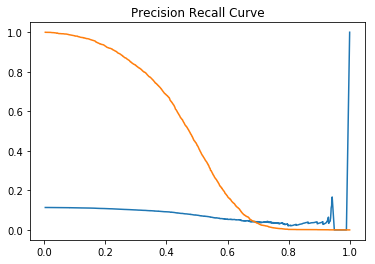

In [45]:
from sklearn.metrics import precision_recall_curve

y_test_num = y_test.copy()
y_test_num = y_test_num.replace('NO', 0)
y_test_num = y_test_num.replace('<30', 1)

model = lrmodel

y_score = model.predict_proba(x_test)[:, 1]
p, r, t = precision_recall_curve(y_test_num, y_score)

# adding last threshold of '1' to threshold list
t = np.vstack([t.reshape([-1, 1]), 1])

plt.plot(t, p)
plt.plot(t, r)
plt.title('Precision Recall Curve')
# yellow = recall
# blue = precision

In [17]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=3, scoring='recall_micro')

In [20]:
x_scaled_undersampled, y_undersampled = rus.fit_sample(x_scaled_liv, y)

In [21]:
# fit the grid with data 
grid.fit(x_scaled_undersampled, y_undersampled);

In [22]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.4871885180945672
{'C': 0.1}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [23]:
lrmodel = linear_model.LogisticRegression(C=0.1)
lrmodel.fit(x_train_undersampled, y_train_undersampled)
# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.666
             precision    recall  f1-score   support

        <30       0.19      0.58      0.28      2839
         NO       0.93      0.68      0.78     22190

avg / total       0.84      0.67      0.73     25029



#### Get the coefficients:

In [26]:
coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [27]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [28]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Coefficients,Feature,abs_val_coef
48,-1.926929,discharge_disposition_id[T.Expired],1.926929
40,1.099186,discharge_disposition_id[T.Discharged/transfer...,1.099186
51,-0.731982,discharge_disposition_id[T.Hospice / home],0.731982
42,0.675508,discharge_disposition_id[T.Discharged/transfer...,0.675508
36,0.632479,discharge_disposition_id[T.Discharged/transfer...,0.632479
105,0.610922,medical_specialty[T.Hematology],0.610922
37,-0.509578,discharge_disposition_id[T.Discharged/transfer...,0.509578
45,0.493708,discharge_disposition_id[T.Discharged/transfer...,0.493708
151,-0.411070,medical_specialty[T.Surgery-Cardiovascular/Tho...,0.411070
181,-0.410666,"diag_2[T.Complications Of Pregnancy, Childbirt...",0.410666


In [63]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 1.0, 0.1))

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=10, scoring='accuracy')

In [ ]:
# fit the grid with data 
grid.fit(x_scaled, y);

In [ ]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [23]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=True)
x_train_poly_undersampled = poly.fit_transform(x_train_undersampled)

In [24]:
x_train_poly_undersampled.shape

(17036, 35512)

In [25]:
x_test_poly_undersampled = poly.transform(x_test)

In [26]:
lrmodel = linear_model.LogisticRegression(C=0.01)

lrmodel.fit(x_train_poly_undersampled, y_train_undersampled)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# Predict on test
y_pred = lrmodel.predict(x_test_poly_undersampled)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.634
             precision    recall  f1-score   support

        <30       0.17      0.59      0.27      2839
         NO       0.92      0.64      0.76     22190

avg / total       0.84      0.63      0.70     25029



In [28]:
storelrmodel = lrmodel

#### Get the coefficients:

In [14]:
#### Get the coefficients:

coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

#### Logistic with SMOTE:

In [16]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

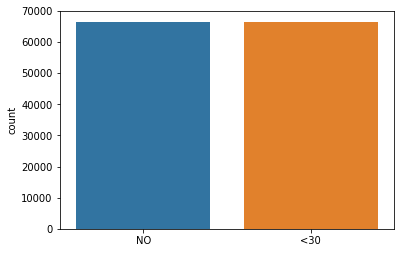

In [17]:
sns.countplot(y_train_smote)

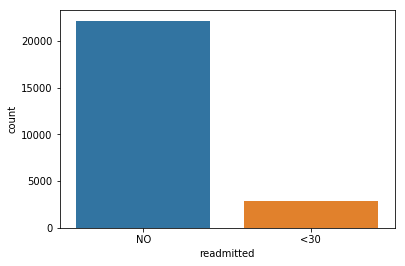

In [18]:
sns.countplot(y_test)

In [19]:
lrmodel = linear_model.LogisticRegression(C=1)
lrmodel.fit(x_train_smote, y_train_smote)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Predict on test
y_pred = lrmodel.predict(x_test)

In [21]:
# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

# recall @ C = 0.1: ?, ?, ?

Accuracy: 0.644
             precision    recall  f1-score   support

        <30       0.18      0.58      0.27      2839
         NO       0.92      0.65      0.77     22190

avg / total       0.84      0.64      0.71     25029



In [22]:
#### Get the coefficients:

coefficients = pd.DataFrame({"Feature":x.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Coefficients,Feature,abs_val_coef
101,2.368216,medical_specialty[T.Gynecology],2.368216
178,2.208711,"diag_2[T.Complications Of Pregnancy, Childbirt...",2.208711
48,2.115362,discharge_disposition_id[T.Hospice / home],2.115362
197,1.877295,"diag_3[T.Complications Of Pregnancy, Childbirt...",1.877295
118,1.807369,medical_specialty[T.Otolaryngology],1.807369
125,1.804284,medical_specialty[T.Pediatrics-Endocrinology],1.804284
31,1.800548,admission_type_id[T.Trauma Center],1.800548
45,-1.662399,discharge_disposition_id[T.Discharged/transfer...,1.662399
226,1.575760,nateglinide[T.Up],1.575760
47,1.520799,discharge_disposition_id[T.Discharged/transfer...,1.520799
